<a href="https://colab.research.google.com/github/MateoProjects/UtilsAI/blob/main/Umap_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMAP Utils

## Imports and requirements

In [1]:
!pip install umap-learn
!pip install datashader
!pip install bokeh
!pip install holoviews


     |████████████████████████████████| 15.8 MB 620 bytes/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 132 kB 54.4 MB/s 
     |████████████████████████████████| 793 kB 34.4 MB/s 
     |████████████████████████████████| 791 kB 24.7 MB/s 
     |████████████████████████████████| 786 kB 40.8 MB/s 
     |████████████████████████████████| 779 kB 45.1 MB/s 
     |████████████████████████████████| 778 kB 26.8 MB/s 
     |████████████████████████████████| 776 kB 44.1 MB/s 
     |████████████████████████████████| 769 kB 19.2 MB/s 
     |████████████████████████████████| 766 kB 47.6 MB/s 
     |████████████████████████████████| 1.0 MB 53.0 MB/s 
     |████████████████████████████████| 722 kB 38.8 MB/s 
     |████████████████████████████████| 722 kB 34.8 MB/s 
     |████████████████████████████████| 715 kB 43.5 MB/s 
     |████████████████████████████████| 705 kB 44.5 MB/s 
     |████████████████████████████████| 699 kB 44.6 MB/s 
     |███████

In [3]:
import numpy as np
import pandas as pd
import umap
import umap.plot
import sklearn.datasets

## Load datasets

In [2]:
pendigits = sklearn.datasets.load_digits()
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

## Fit Model

In [4]:
mapper = umap.UMAP().fit(pendigits.data)


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


## Plots

1. We can specify labels

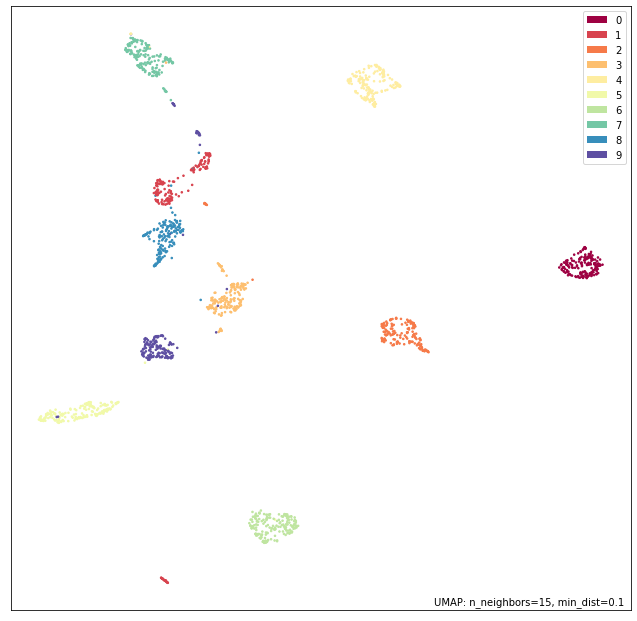

In [5]:
umap.plot.points(mapper, labels=pendigits.target)


Or we can change theme

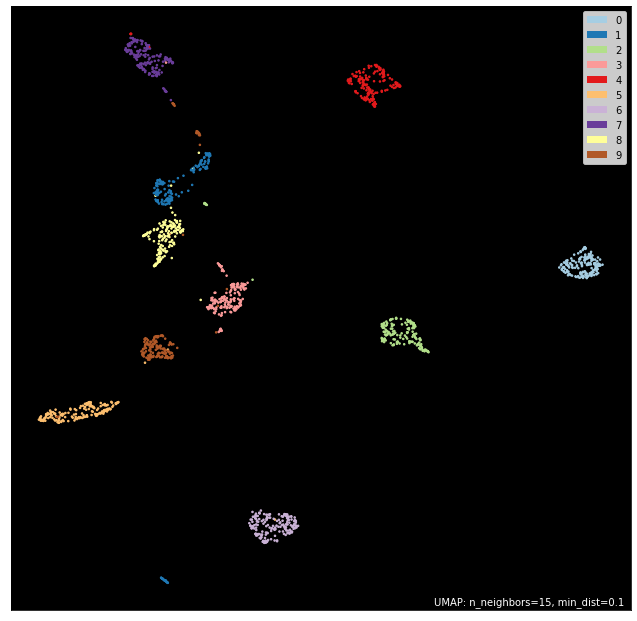

In [6]:
umap.plot.points(mapper, labels=pendigits.target, color_key_cmap='Paired', background='black')


## For larger Datasets

In [7]:
mapper = umap.UMAP().fit(fmnist.data)


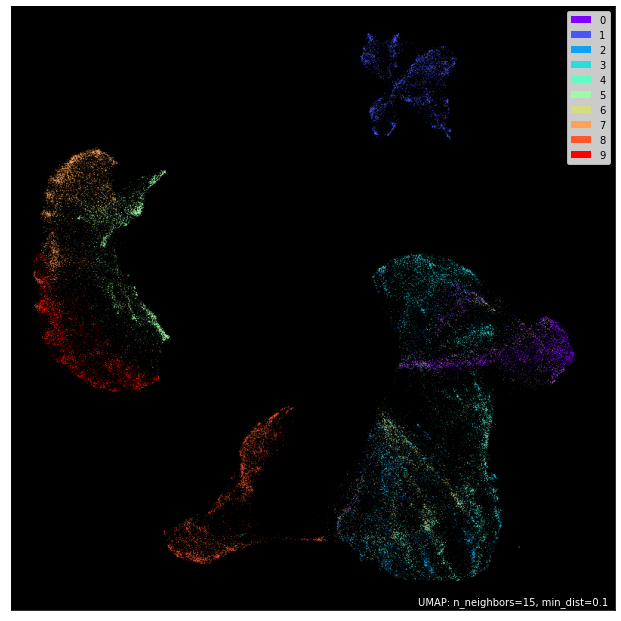

In [8]:
umap.plot.points(mapper, labels=fmnist.target, theme='fire')


## Interactive Plots

In [9]:
mapper = umap.UMAP().fit(fmnist.data[:30000])


In [10]:
hover_data = pd.DataFrame({'index':np.arange(30000),
                           'label':fmnist.target[:30000]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

# define first data and labels items for map

In [11]:
umap.plot.output_notebook() # i think it's only for obtain interactive plot on notebook
p = umap.plot.interactive(mapper, labels=fmnist.target[:30000], hover_data=hover_data, point_size=2)
umap.plot.show(p)

We can plot connectiviy between points

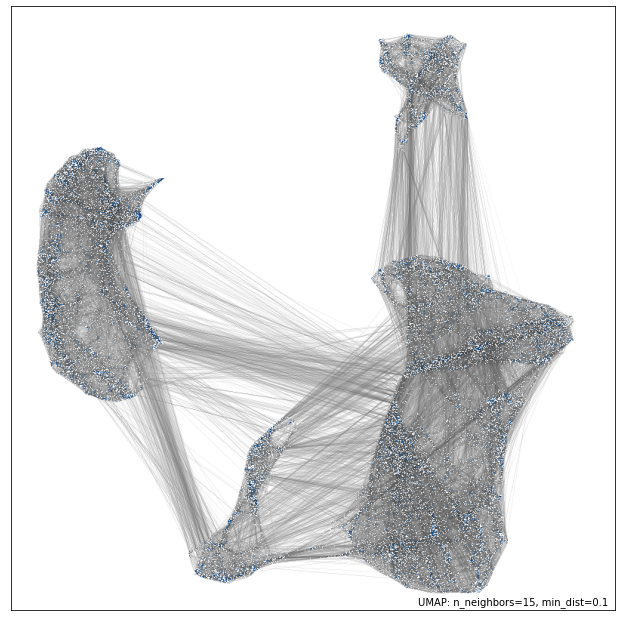

In [12]:
umap.plot.connectivity(mapper, show_points=True)


## Use for PCA

In [13]:
mapper = umap.UMAP().fit(mnist.data)


The first diagnostic type is a Principal Components Analysis based diagnostic, which you can select with diagnostic_type='pca'. The essence of the approach is that we can use PCA, which preserves global structure, to reduce the data to three dimensions. If we scale the results to fit in a 3D cube we can convert the 3D PCA coordinates of each point into an RGB description of a color. By then coloring the points in the UMAP embedding with the colors induced by the PCA it is possible to get a sense of how some of the more large scale global structure has been represented in the embedding.

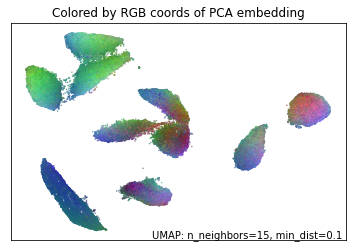

In [14]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')


## Example for digits

In [19]:
from sklearn.datasets import load_digits
import seaborn as sns

digits = load_digits()


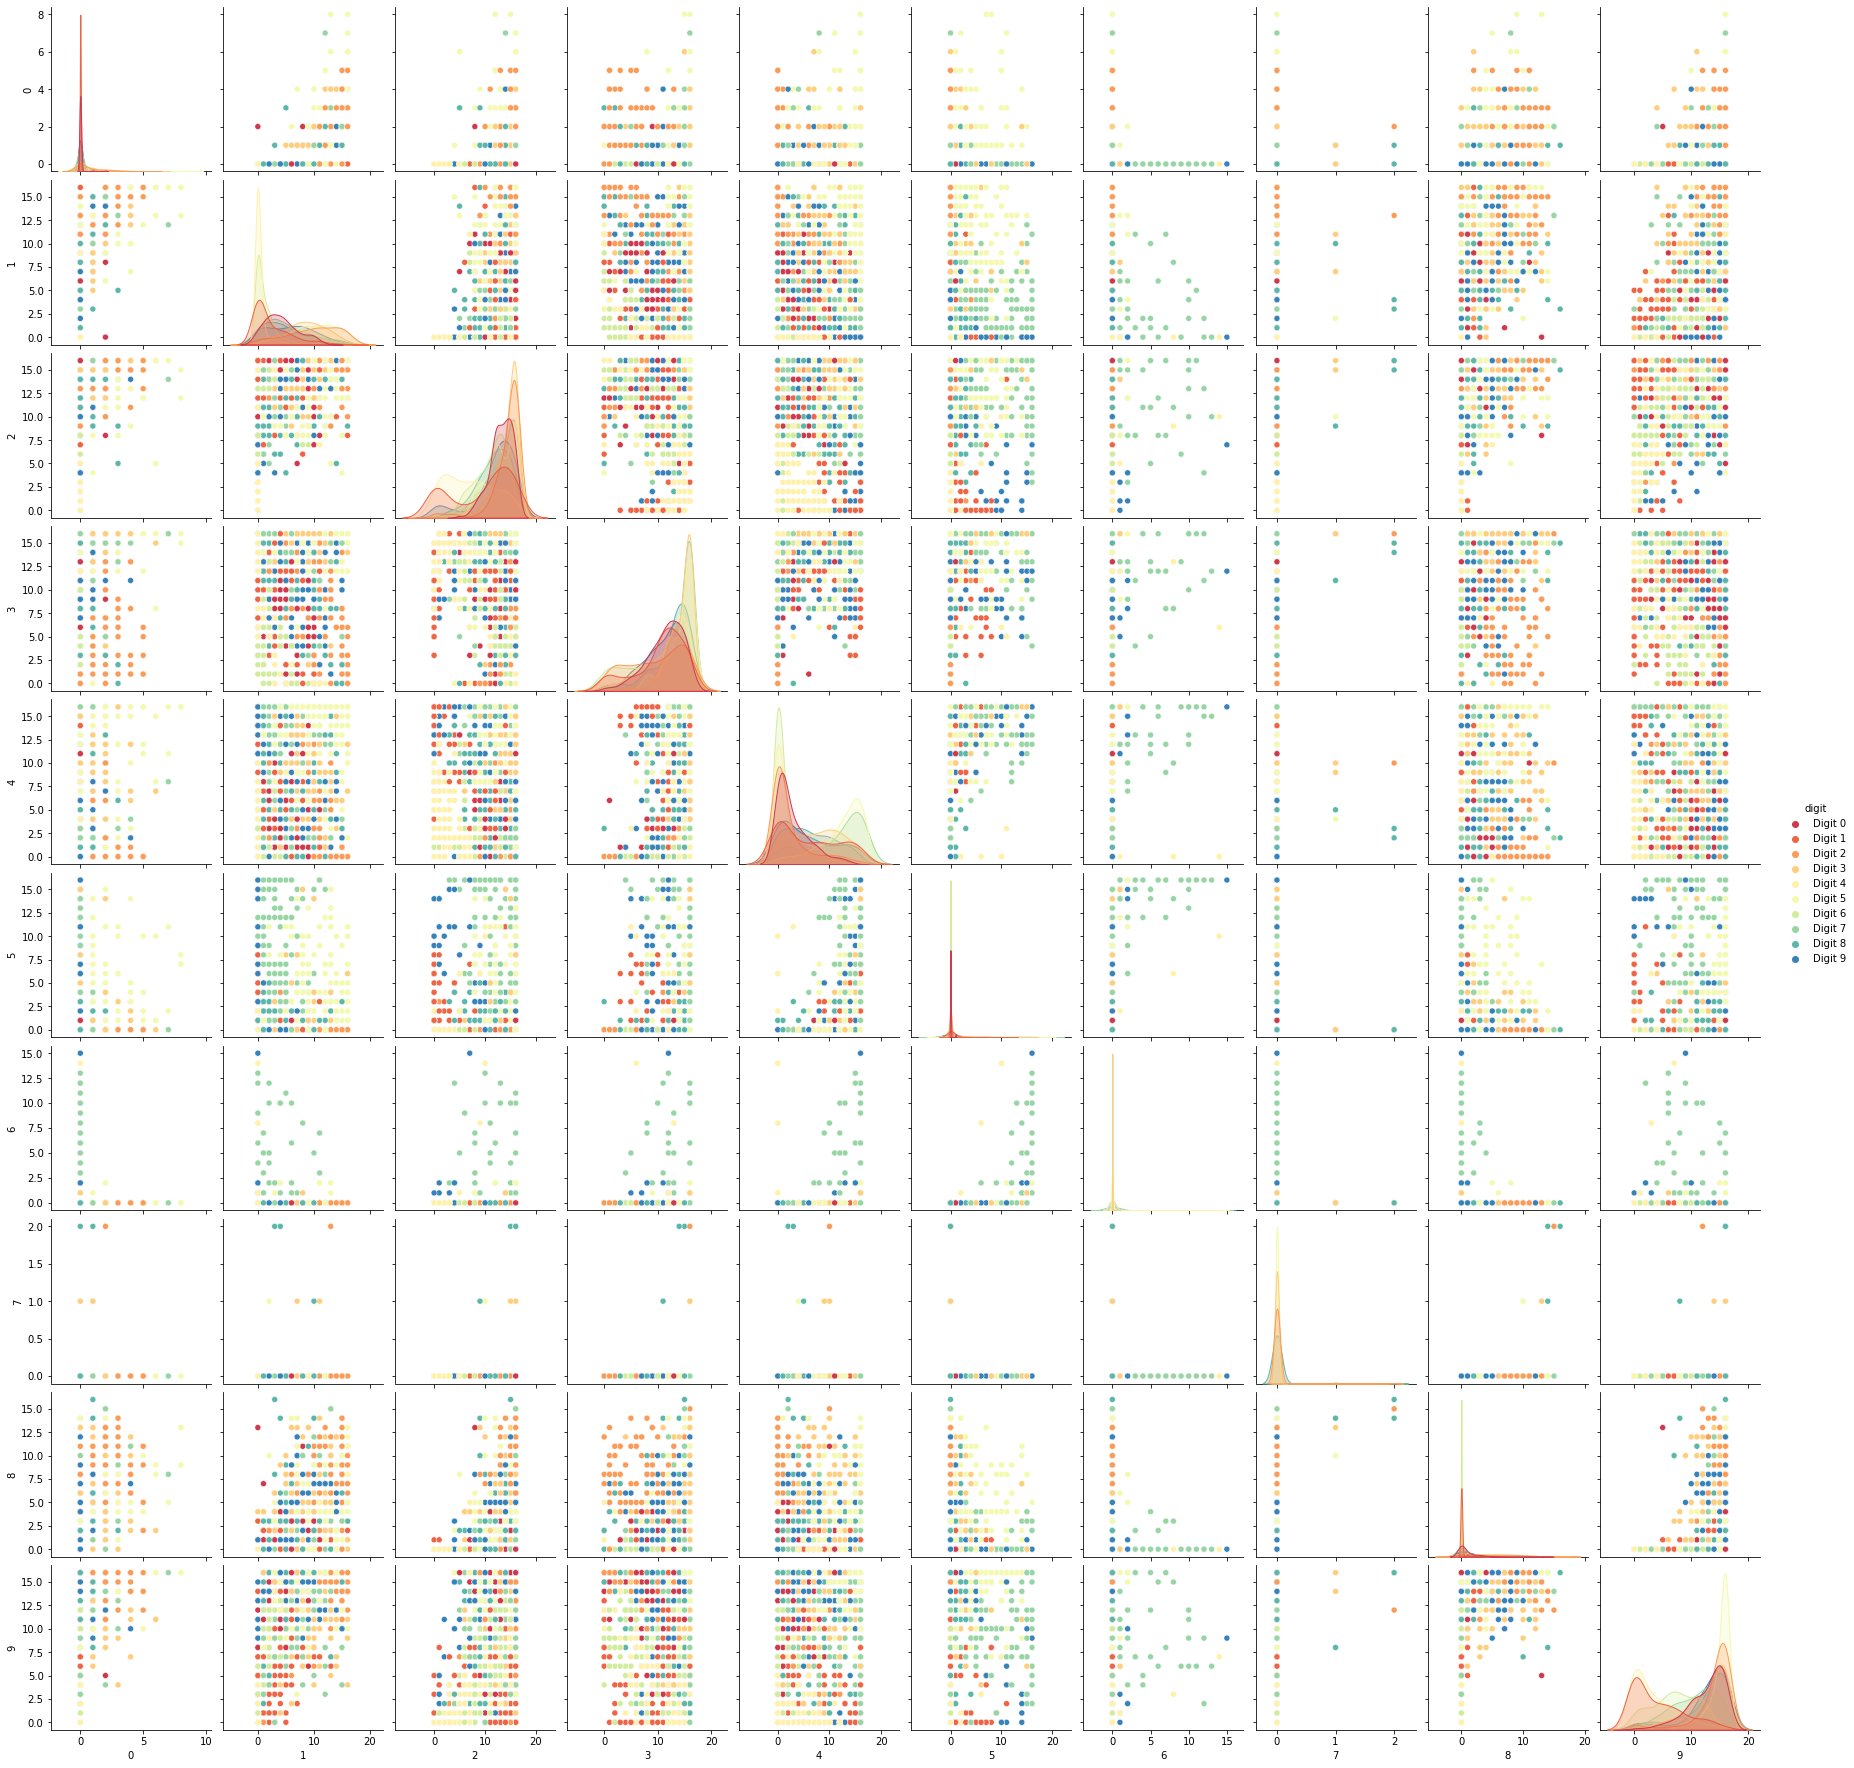

In [20]:
digits_df = pd.DataFrame(digits.data[:,1:11])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral')